In [3]:
from PIL import Image

# Read in the image
image = Image.open('mapped2.png')

# Print out the dimensions
print(image.size)

(26, 26)


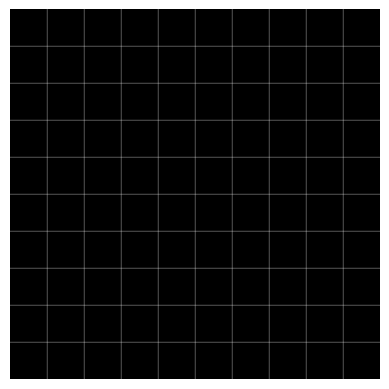

In [4]:
import numpy as np

import matplotlib.pyplot as plt

# Create a black canvas
canvas = np.zeros((1080, 1080, 3), dtype=np.uint8)

# Define the grid size
grid_size = 10
cell_size = 1080 // grid_size

# Draw the grid lines
for i in range(1, grid_size):
    # Horizontal lines
    canvas[i * cell_size, :] = 255
    # Vertical lines
    canvas[:, i * cell_size] = 255

# Display the canvas
plt.imshow(canvas)
plt.axis('off')
plt.show()

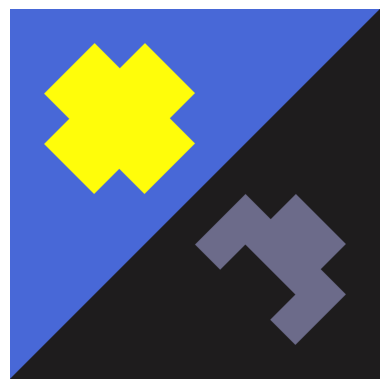

In [5]:
# Scale the image to be bigger than the canvas
new_size = int(1080 * 2.5)  # Increase the size by 50%
scaled_image_bigger = image.resize((new_size, new_size), Image.NEAREST)

angle = 45
# Rotate the scaled image
rotated_image_bigger = scaled_image_bigger.rotate(angle)

# Crop the rotated image to 1080x1080
left = (rotated_image_bigger.width - 1080) / 2
top = (rotated_image_bigger.height - 1080) / 2
right = (rotated_image_bigger.width + 1080) / 2
bottom = (rotated_image_bigger.height + 1080) / 2
cropped_image = rotated_image_bigger.crop((left, top, right, bottom))

# Convert the cropped image to a numpy array
cropped_image_np = np.array(cropped_image)

# Place the cropped image on the canvas
canvas[:cropped_image_np.shape[0], :cropped_image_np.shape[1]] = cropped_image_np

# Display the canvas with the cropped image
plt.imshow(canvas)
plt.axis('off')
plt.show()

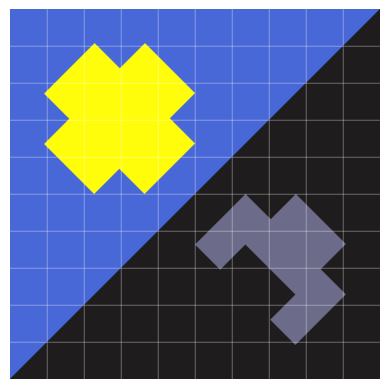

In [6]:
# Draw the grid lines over the canvas with the cropped image
for i in range(1, grid_size):
    # Horizontal lines
    canvas[i * cell_size, :] = 255
    # Vertical lines
    canvas[:, i * cell_size] = 255

# Display the canvas with the grid lines
plt.imshow(canvas)
plt.axis('off')
plt.show()

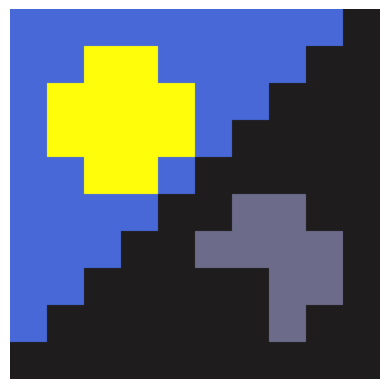

In [7]:
from collections import Counter

# Create a new canvas for the resampled image
resampled_canvas = np.zeros_like(canvas)

# Iterate through each cell in the grid
for row in range(grid_size):
    for col in range(grid_size):
        # Get the coordinates of the current cell
        start_row = row * cell_size
        end_row = start_row + cell_size
        start_col = col * cell_size
        end_col = start_col + cell_size
        
        # Extract the cell from the canvas
        cell = canvas[start_row:end_row, start_col:end_col]
        
        # Find the most frequent color in the cell
        cell_flat = cell.reshape(-1, cell.shape[-1])
        most_common_color = Counter(map(tuple, cell_flat)).most_common(1)[0][0]
        
        # Fill the resampled canvas with the most common color
        resampled_canvas[start_row:end_row, start_col:end_col] = most_common_color

# Display the resampled canvas
plt.imshow(resampled_canvas)
plt.axis('off')
plt.show()